In [34]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [35]:
csv_file = []
flutter_csv = []

DATA SCRAPING AND CRAWLING

In [36]:
with open('just.txt', 'w', encoding='utf-8') as file:

    for i in range(1,9):
        url = "https://kissanime.com.ru/AnimeListOnline/Trending?page="+str(i)
        html = requests.get(url)
        soup = BeautifulSoup(html.content, 'html.parser')

        a_name = soup.find_all('a',class_="item_movies_link jtitle")
        
        anime_name_link = [link['href'] for link in a_name]

        for url in anime_name_link:
            link_html = requests.get(url)
            link_soup = BeautifulSoup(link_html.content, 'html.parser')

            link_results = link_soup.find(id='leftside')

            anime_name=link_results.find("strong" ,class_="bigChar jtitle")
            file.write(f'Name = {anime_name.text}\n')
            # print(anime_name.text)

            alt_name = link_results.find("a" ,class_="dotUnder")
            file.write(f'Altname = {alt_name.text}\n')
            # print(alt_name.text)

            aa = link_soup.find(class_="static_single")
            two = aa.find_all("p",class_="item_static")

            Condition=two[0].text.split(': ')[1]
            file.write(f'Condition = {Condition}\n')
            # print(Condition)

            Views = two[1].text.split(': ')[1]
            file.write(f'No_of_views = {Views}\n')
            # print(Views)

            ab = link_soup.find(class_="summary")
            summary = ab.find('p')
            d = summary.text
            if len(d)>50:
                letters = d[:75] + '...'
            else:
                letters = d
            file.write(f'About this anime : {summary.text}\n')
            # print(summary.text)

            ac = link_soup.find(class_="listing listing8515 full")
            episo = ac.find("h3")
            
            if episo:
                Latest_episode = episo.text.split(' ')[-1]
                file.write(f'Latest_episode = {Latest_episode}\n \n')
            else:
                Latest_episode = 0
                file.write(f'Latest_episode = {Latest_episode}\n \n')
            ad = link_soup.find(id="rightside")
            img_tag = ad.find('img')
            Image_src = img_tag['src']
            file.write(f'Image src: {Image_src}\n')
            # print(src)

            csv_file.append([anime_name.text, Condition, Views, Latest_episode])
            flutter_csv.append([anime_name.text, Condition, Views, Latest_episode,Image_src,url,letters])
            # print(letters)

In [37]:
df = pd.DataFrame(csv_file, columns=['Anime Name', 'Condition', 'Views', 'Latest Episode'])
df.to_csv('anime_data.csv', index=False)

fdf = pd.DataFrame(flutter_csv, columns=['Anime Name', 'Condition', 'Views', 'Latest_Episode','Image_src','Link','Summary'])

In [38]:
fdf['Latest_Episode'] = fdf['Latest_Episode'].replace('\n', '', regex=True)
Fmask = fdf['Latest_Episode'].str.isdigit()
fdf = fdf[Fmask]
fdf.to_csv('flutter.csv', index=False)


DATA CLEANING

In [39]:
dff = pd.read_csv("anime_data.csv")
dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,Completed,"6,641,739",012\n
1,One Piece,Ongoing,"400,767,198",1054\n
2,SPY x FAMILY,Completed,"5,752,053",012\n
3,Attack on Titan Final Season,Completed,"16,544,016",016\n
4,Black Clover,Completed,"92,301,785",170\n


In [40]:
dff['Latest Episode'] = dff['Latest Episode'].replace('\n', '', regex=True)
dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,Completed,"6,641,739",012
1,One Piece,Ongoing,"400,767,198",1054
2,SPY x FAMILY,Completed,"5,752,053",012
3,Attack on Titan Final Season,Completed,"16,544,016",016
4,Black Clover,Completed,"92,301,785",170


Some of the elements in the Latest Episode didnt not contain digits but rather words.
so in the code below we removed the rows containing such non-digits.

In [41]:
mask = dff['Latest Episode'].str.isdigit()
dff = dff[mask]
dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,Completed,"6,641,739",012
1,One Piece,Ongoing,"400,767,198",1054
2,SPY x FAMILY,Completed,"5,752,053",012
3,Attack on Titan Final Season,Completed,"16,544,016",016
4,Black Clover,Completed,"92,301,785",170


Converted the views and latest Episode to floating numbers(preprocessing)

In [42]:
dff['Views'] = dff['Views'].str.replace(',', '').astype(float)
dff['Latest Episode'] = dff['Latest Episode'].astype(float)

dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,Completed,6641739.0,12.0
1,One Piece,Ongoing,400767198.0,1054.0
2,SPY x FAMILY,Completed,5752053.0,12.0
3,Attack on Titan Final Season,Completed,16544016.0,16.0
4,Black Clover,Completed,92301785.0,170.0


In [43]:
dff.to_csv('anime1.csv',index=False)

Ongoing = 1 .........and........... Completed =0

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col = ['Condition']
for i in col:
    dff[i]=le.fit_transform(dff[i])
dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,0,6641739.0,12.0
1,One Piece,1,400767198.0,1054.0
2,SPY x FAMILY,0,5752053.0,12.0
3,Attack on Titan Final Season,0,16544016.0,16.0
4,Black Clover,0,92301785.0,170.0


In [45]:
dff.to_csv('anime2.csv',index=False)

DATA VISUALATION

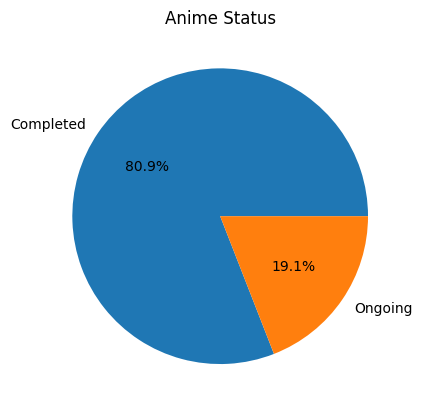

In [46]:
import matplotlib.pyplot as plt

condition_counts = dff.groupby('Condition')['Anime Name'].count()
plt.pie(condition_counts.values, labels=['Completed','Ongoing'], autopct='%1.1f%%')
plt.title('Anime Status')
plt.show()


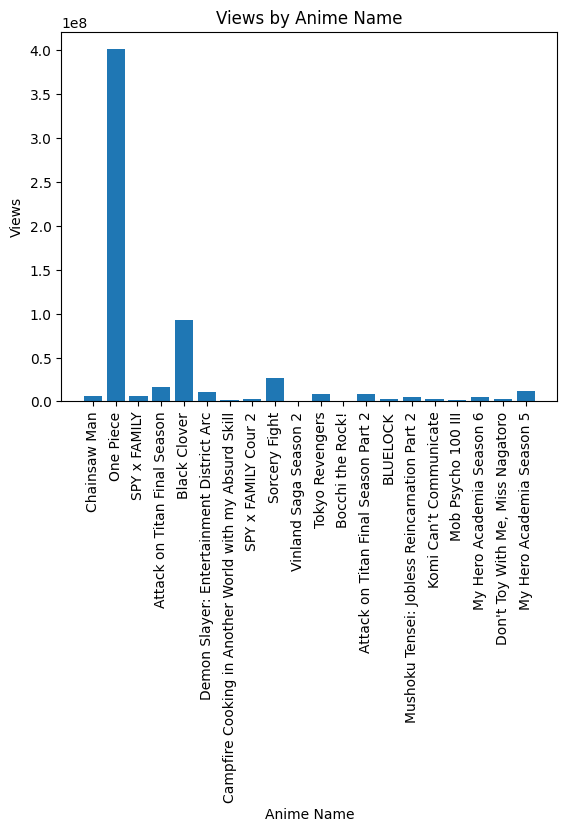

In [47]:
dff['Views'] = dff['Views'].astype(int)
df_graph = dff.head(20)
plt.bar(df_graph['Anime Name'], df_graph['Views'])
plt.xticks(rotation=90)
plt.xlabel('Anime Name')
plt.ylabel('Views')
plt.title('Views by Anime Name')

plt.show()

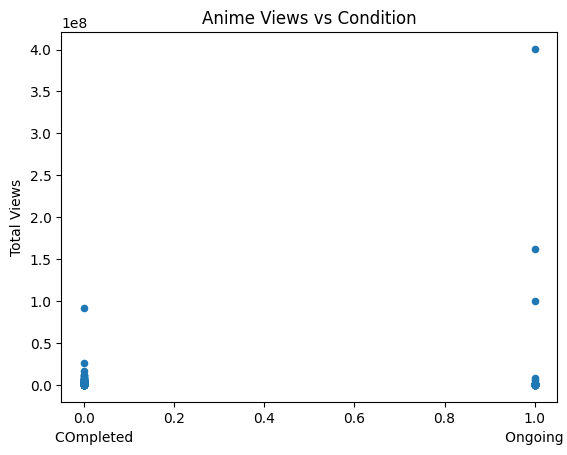

In [48]:
dff.head(200).plot(kind='scatter', x='Condition', y='Views')

plt.xlabel('COmpleted                                                                                     Ongoing')
plt.ylabel('Total Views')
plt.title('Anime Views vs Condition')

plt.show()

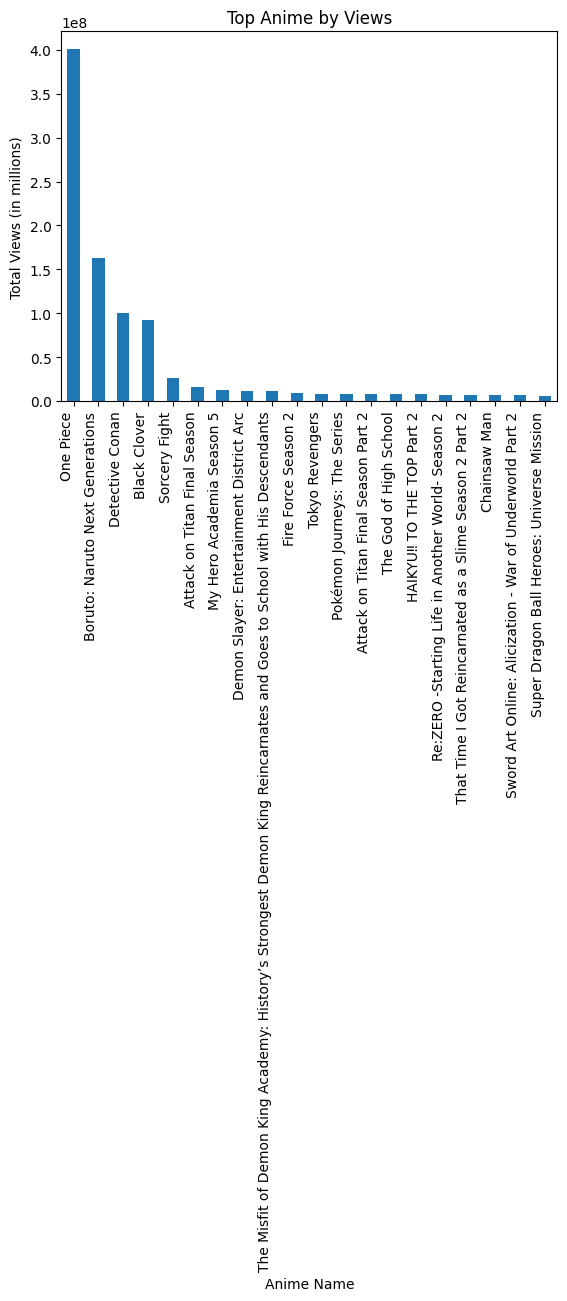

In [49]:
anime_views = dff.groupby('Anime Name')['Views'].sum().sort_values(ascending=False)[:20]

# Create bar chart
anime_views.plot(kind='bar')
plt.title('Top Anime by Views')
plt.xlabel('Anime Name')
plt.ylabel('Total Views (in millions)')
plt.xticks(rotation=90, ha='right')
plt.show()

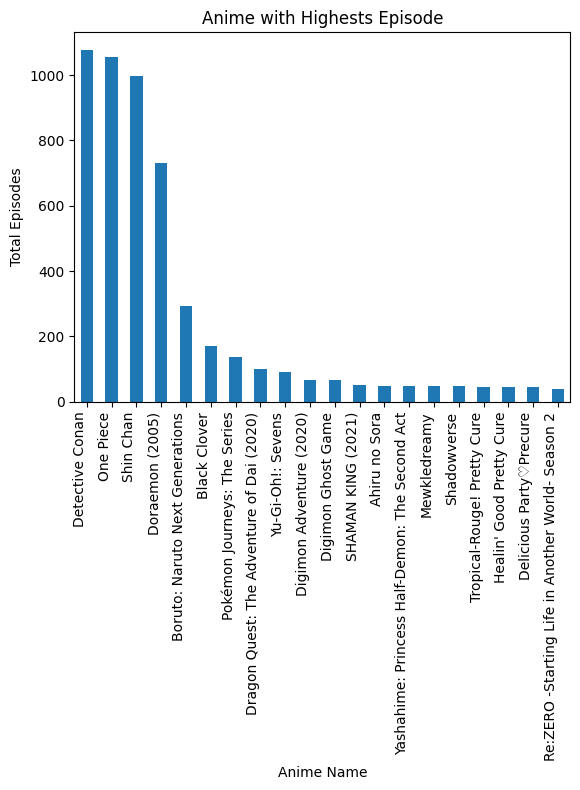

In [50]:
anime_views = dff.groupby('Anime Name')['Latest Episode'].sum().sort_values(ascending=False)[:20]

# Create bar chart
anime_views.plot(kind='bar')
plt.title('Anime with Highests Episode')
plt.xlabel('Anime Name')
plt.ylabel('Total Episodes')
plt.xticks(rotation=90, ha='right')
plt.show()